In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import imutils
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import drive
import os
from io import BytesIO
from PIL import Image
import IPython.display as display



Mounted at /content/drive


**Certain sections for the OpenCV code were adpated from the following resource:** https://vinodpatildev.medium.com/deep-learning-cnn-model-to-auto-detect-vehicles-number-plate-using-python-and-api-195a773a90e4

**Section 1: License Plate Detection & Character Segmentation**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


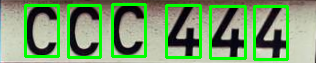

New license plate begins with label: CCC444


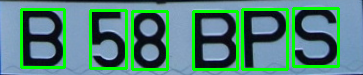

New license plate begins with label: B58BPS


New license plate begins with label: PGMN112


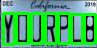

New license plate begins with label: Y0URPL8


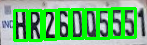

New license plate begins with label: HR26DQ5551


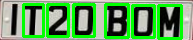

New license plate begins with label: IT20B0M


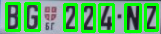

New license plate begins with label: BG224NZ


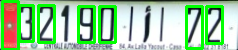

New license plate begins with label: 3219072


New license plate begins with label: DZI7YXR


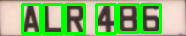

New license plate begins with label: ALR486


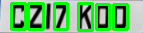

New license plate begins with label: CZI7K0D


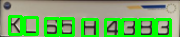

New license plate begins with label: KL65H4383


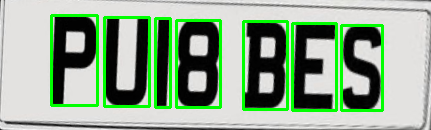

New license plate begins with label: PUI8BES


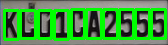

New license plate begins with label: KL01CA2555


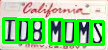

New license plate begins with label: ID8M0MS


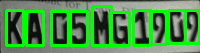

New license plate begins with label: KA05MG1909


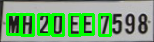

New license plate begins with label: MH20EE7598


New license plate begins with label: M666Y0B


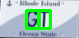

New license plate begins with label: GT


New license plate begins with label: LR33TEE


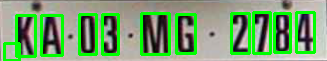

New license plate begins with label: KA03MG2784


New license plate begins with label: M771276


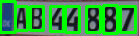

New license plate begins with label: AB44887


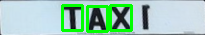

New license plate begins with label: TAXI


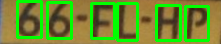

New license plate begins with label: 66FLHP


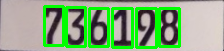

New license plate begins with label: 736198 (1)


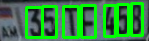

New license plate begins with label: 35TF458


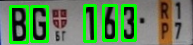

New license plate begins with label: BG163


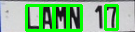

New license plate begins with label: LAWN17


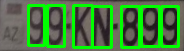

New license plate begins with label: 99KN899


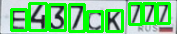

New license plate begins with label: E437CK777


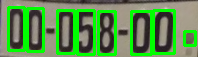

New license plate begins with label: 0005800


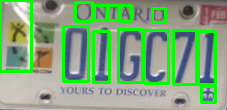

New license plate begins with label: 01GC71


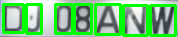

New license plate begins with label: DJ08ANW


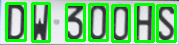

New license plate begins with label: DW300HS


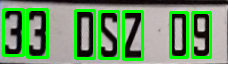

New license plate begins with label: 33DSZ09


New license plate begins with label: JGF433


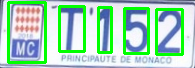

New license plate begins with label: T152


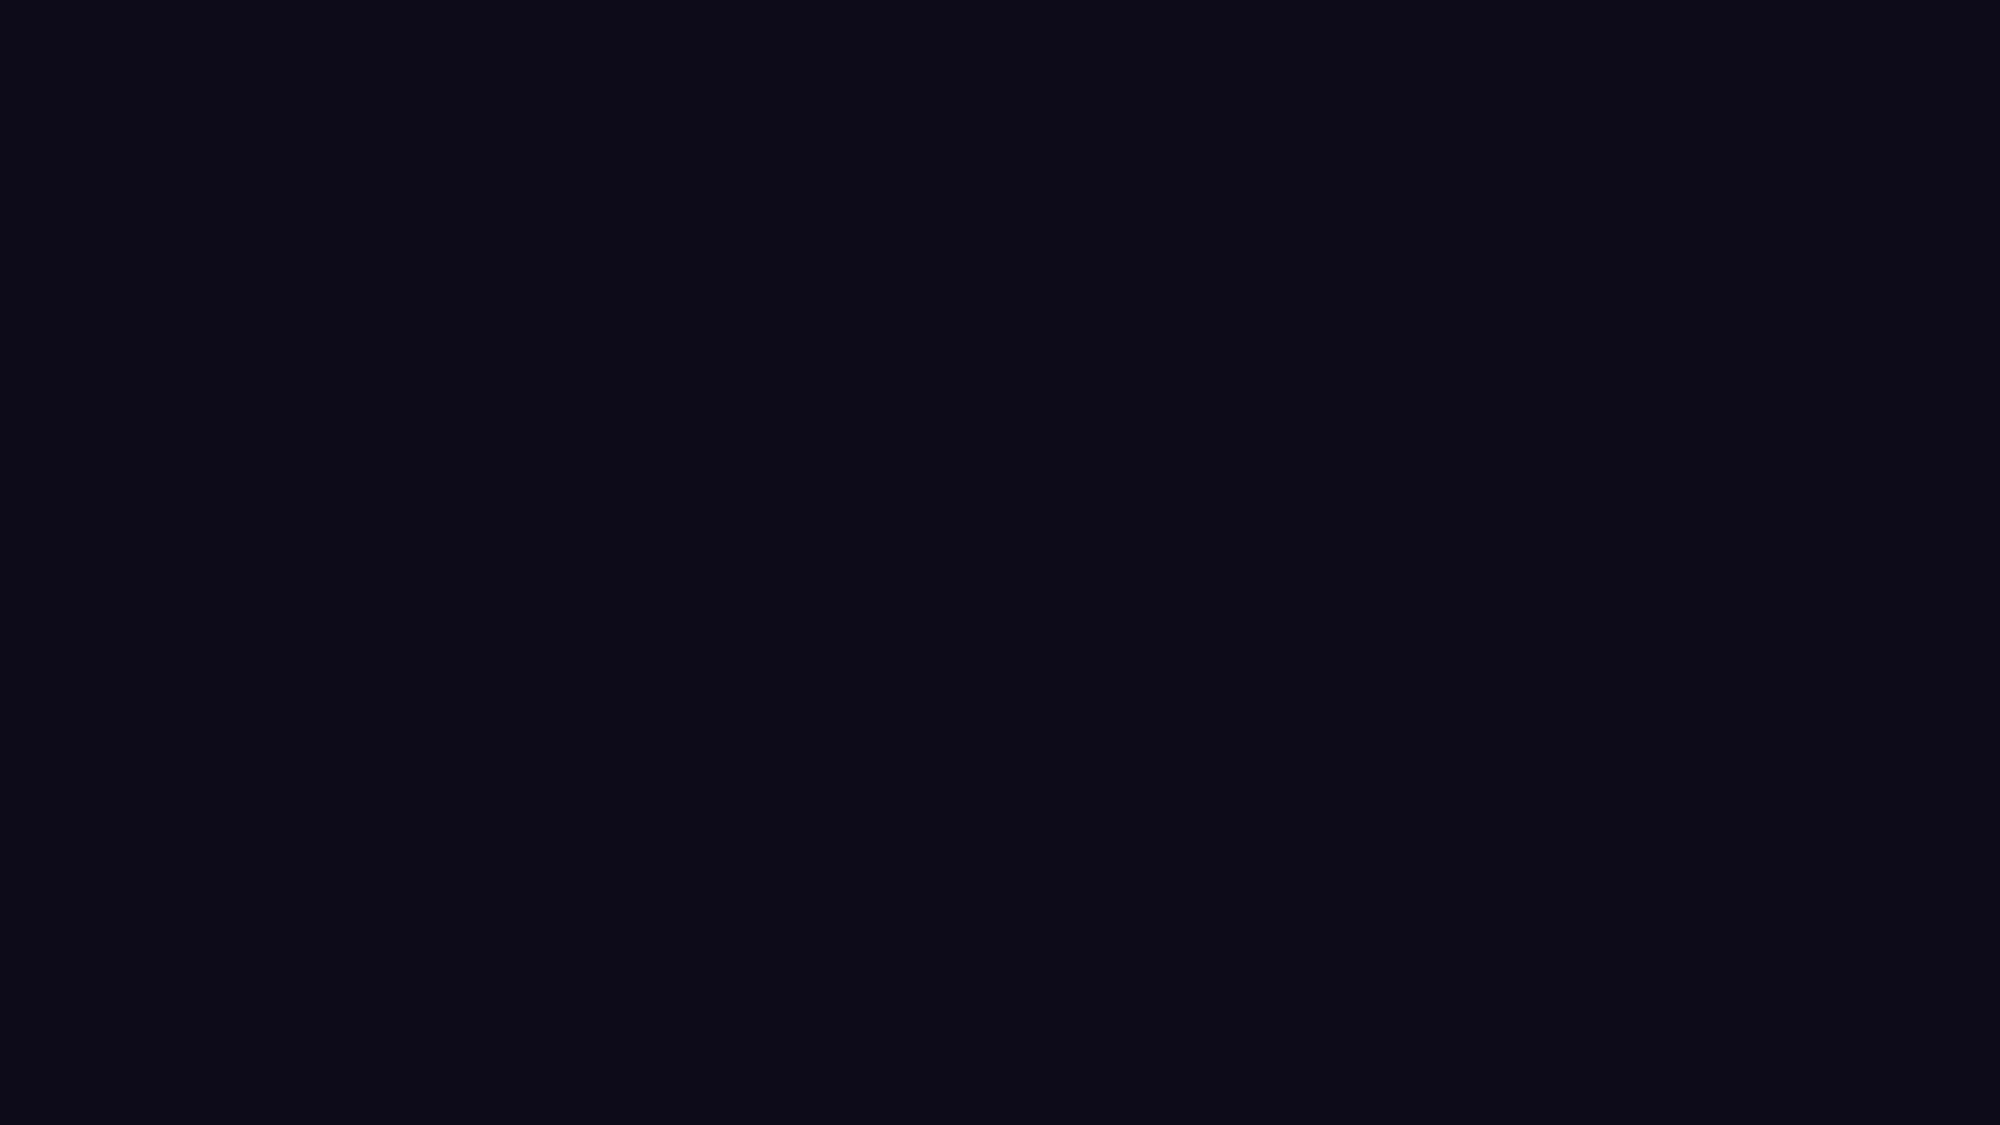

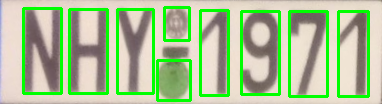

New license plate begins with label: NHY1971


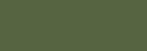

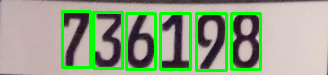

New license plate begins with label: 736198


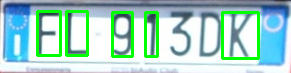

New license plate begins with label: FL913DK


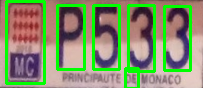

New license plate begins with label: P533


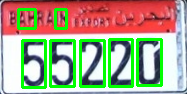

New license plate begins with label: 55220


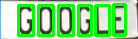

New license plate begins with label: G00GLE
License Plate 1 contains 6 characters:
Character 1


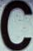

Character 2


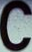

Character 3


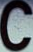

Character 4


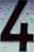

Character 5


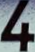

Character 6


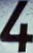

New license plate begins
License Plate 2 contains 6 characters:
Character 1


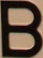

Character 2


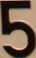

Character 3


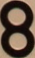

Character 4


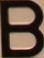

Character 5


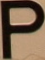

Character 6


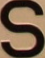

New license plate begins
License Plate 3 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 4 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 5 contains 9 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


New license plate begins
License Plate 6 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 7 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 8 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 9 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 10 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 11 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 12 contains 9 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


New license plate begins
License Plate 13 contains 7 characters:
Character 1


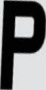

Character 2


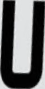

Character 3


Character 4


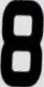

Character 5


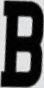

Character 6


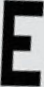

Character 7


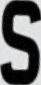

New license plate begins
License Plate 14 contains 10 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


Character 10


New license plate begins
License Plate 15 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 16 contains 10 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


Character 10


New license plate begins
License Plate 17 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 18 contains 5 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


New license plate begins
License Plate 19 contains 2 characters:
Character 1


Character 2


New license plate begins
License Plate 20 contains 8 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


New license plate begins
License Plate 21 contains 11 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


Character 10


Character 11


New license plate begins
License Plate 22 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 23 contains 8 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


New license plate begins
License Plate 24 contains 3 characters:
Character 1


Character 2


Character 3


New license plate begins
License Plate 25 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 26 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 27 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 28 contains 5 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


New license plate begins
License Plate 29 contains 5 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


New license plate begins
License Plate 30 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 31 contains 9 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


New license plate begins
License Plate 32 contains 8 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


New license plate begins
License Plate 33 contains 13 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


Character 8


Character 9


Character 10


Character 11


Character 12


Character 13


New license plate begins
License Plate 34 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 35 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 36 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 37 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 38 contains 5 characters:
Character 1


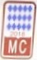

Character 2


Character 3


Character 4


Character 5


New license plate begins
License Plate 39 contains 9 characters:
Character 1


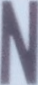

Character 2


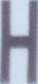

Character 3


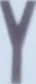

Character 4


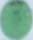

Character 5


Character 6


Character 7


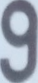

Character 8


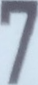

Character 9


New license plate begins
License Plate 40 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 41 contains 5 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


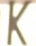

New license plate begins
License Plate 42 contains 6 characters:
Character 1


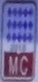

Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins
License Plate 43 contains 7 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


Character 7


New license plate begins
License Plate 44 contains 6 characters:
Character 1


Character 2


Character 3


Character 4


Character 5


Character 6


New license plate begins


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


dataset_path = '/content/drive/My Drive/worked_cars/'


segmented_characters = []


for folder_name in os.listdir(dataset_path):# iterating through each folder (class) in the dataset
    folder_path = os.path.join(dataset_path, folder_name)


    current_plate_characters = []


    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)


        if img is None:
            print(f"Image not loaded: {img_path}")
            continue
        #the following few sections incorporated ideas and methods from this resource: https://vinodpatildev.medium.com/deep-learning-cnn-model-to-auto-detect-vehicles-number-plate-using-python-and-api-195a773a90e4

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converting the image to grayscale


        gray = cv2.bilateralFilter(gray, 11, 17, 17) # using bilateral filter to reduce noise


        edges = cv2.Canny(gray, 30, 200) # edge detection

        # Find contours based on edges
        contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(contours)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

        license_plate_contour = None

        # Interate through contours to find the one that corresponds to the license plate
        for c in contours:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.018 * peri, True)
            if len(approx) == 4:
                license_plate_contour = approx
                break

        # If the license plate contour is found, crop the license plate from the image
        if license_plate_contour is not None:
            pts = license_plate_contour.reshape(4, 2)
            rect = np.zeros((4, 2), dtype="float32")

            s = pts.sum(axis=1)

            #identifying the corners based on the sum
            rect[0] = pts[np.argmin(s)] #returns index of the smallest value of 's'
            rect[2] = pts[np.argmax(s)] #returns index of the biggest value of 's'

            diff = np.diff(pts, axis=1) #calculate the difference between coordinates

            #the top-right and bottom-left corners).
            rect[1] = pts[np.argmin(diff)]
            rect[3] = pts[np.argmax(diff)]

            (tl, tr, br, bl) = rect

            # Finding the width of the rectangle to make sure its the largest dimension is being used
            widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2)) #distance between the bottom-left (bl) and bottom-right (br) corners using the Euclidean distance formula
            widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2)) #computed similarly as above
            maxWidth = max(int(widthA), int(widthB))

            #compute the height of the rectangle
            heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
            heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
            maxHeight = max(int(heightA), int(heightB))

            # Set up the destination points for the perspective transform
            dst = np.array([
                [0, 0],
                [maxWidth - 1, 0],
                [maxWidth - 1, maxHeight - 1],
                [0, maxHeight - 1]], dtype="float32")



            # # Apply the perspective transform - Got perspective transform syntax and application method from https://www.geeksforgeeks.org/perspective-transformation-python-opencv/
            M = cv2.getPerspectiveTransform(rect, dst)
            license_plate = cv2.warpPerspective(img, M, (maxWidth, maxHeight))

            # Convert the cropped license plate to grayscale
            license_plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY) # Convert the cropped license plate to grayscale

            # Apply adaptive thresholding to get a binary image - Got adaptive thresholding syntax and method from https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-2-adaptive-thresholding/
            thresh = cv2.adaptiveThreshold(license_plate_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

            # Finding contours on cropped image
            char_contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            char_contours = imutils.grab_contours(char_contours)
            char_contours = sorted(char_contours, key=lambda c: cv2.boundingRect(c)[0])


            individual_chars = [] #list to store individual character images

            # Draw rectangles around each detected character and save individual character images
            for contour in char_contours:
                x, y, w, h = cv2.boundingRect(contour)
                aspect_ratio = w / float(h)
                if w > 10 and h > 10 and 0.1 < aspect_ratio < 1.0:  # Filter out small contours which cannot be a license plate character
                    char_img = license_plate[y:y + h, x:x + w]
                    char_img_pil = Image.fromarray(char_img)


                    buffered = BytesIO()
                    char_img_pil.save(buffered, format="PNG") # save individual character images

                    individual_chars.append(char_img_pil)# store the character image


            # Display the license plate with highlighted characters
            if license_plate_contour is not None:

                for contour in char_contours:
                    x, y, w, h = cv2.boundingRect(contour) # Highlight the characters detected in the image
                    aspect_ratio = w / float(h)
                    if w > 10 and h > 10 and 0.1 < aspect_ratio < 1.0:  # Filter out small contours which cannot be a license plate character
                        cv2.rectangle(license_plate, (x, y), (x + w, y + h), (0, 255, 0), 2)


                license_plate_pil = Image.fromarray(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
                display.display(license_plate_pil)

            # Store the list of segmented characters for the current license plate
            if individual_chars:
                segmented_characters.append(individual_chars)
                print(f"New license plate begins with label: {folder_name}")

# Display images
for i, plate in enumerate(segmented_characters):
    print(f"License Plate {i + 1} contains {len(plate)} characters:")
    for j, char_img_pil in enumerate(plate):
        print(f"Character {j + 1}")
        display.display(char_img_pil)
    print("New license plate begins")


**Section 2: Alpha-Numeric Character Recognition**

Used lab and lecture content

Epoch [1/15], Train Loss: 1.3364, Val Loss: 0.3782, Val Accuracy: 91.90%
Epoch [2/15], Train Loss: 0.1867, Val Loss: 0.1479, Val Accuracy: 97.27%
Epoch [3/15], Train Loss: 0.0605, Val Loss: 0.0950, Val Accuracy: 97.37%
Epoch [4/15], Train Loss: 0.0251, Val Loss: 0.0788, Val Accuracy: 98.09%
Epoch [5/15], Train Loss: 0.0122, Val Loss: 0.0660, Val Accuracy: 98.45%
Epoch [6/15], Train Loss: 0.0073, Val Loss: 0.0635, Val Accuracy: 98.30%
Epoch [7/15], Train Loss: 0.0050, Val Loss: 0.0600, Val Accuracy: 98.40%
Epoch [8/15], Train Loss: 0.0037, Val Loss: 0.0600, Val Accuracy: 98.40%
Epoch [9/15], Train Loss: 0.0029, Val Loss: 0.0586, Val Accuracy: 98.45%
Epoch [10/15], Train Loss: 0.0023, Val Loss: 0.0580, Val Accuracy: 98.40%
Epoch [11/15], Train Loss: 0.0018, Val Loss: 0.0552, Val Accuracy: 98.56%
Epoch [12/15], Train Loss: 0.0015, Val Loss: 0.0548, Val Accuracy: 98.40%
Epoch [13/15], Train Loss: 0.0012, Val Loss: 0.0564, Val Accuracy: 98.45%
Epoch [14/15], Train Loss: 0.0010, Val Loss: 0.

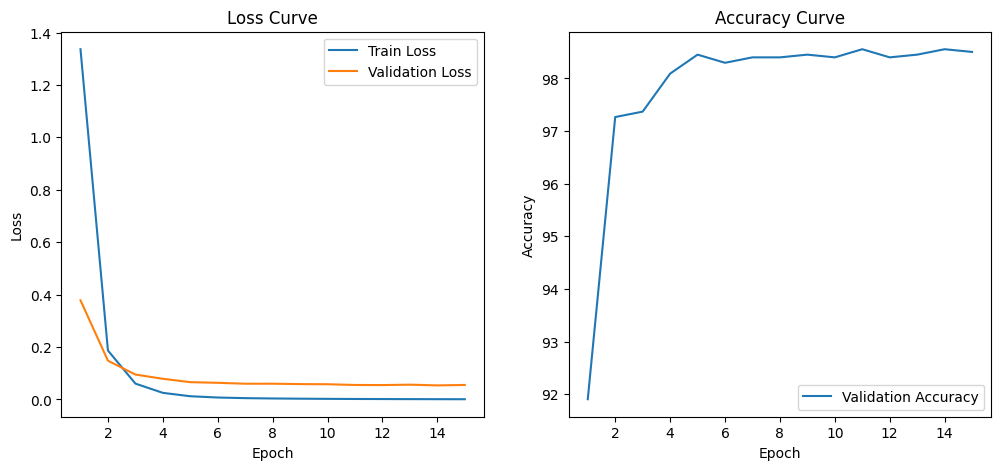

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),  # If images are RGB, remove this line
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for grayscale images
])

# Load dataset
dataset = datasets.ImageFolder('/content/drive/My Drive/A-3_and_numbers/', transform=transform)

# Calculate dataset sizes for train, validation, and test splits
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 32 * 32, 256)  # Adjusted input size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, len(dataset.classes))

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)  # Flatten the output
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = SimpleCNN()


'''
Epochs = 15
Batch Size = 64
Learning Rate = 0.0001
Optimizer = Adam
'''

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    val_accuracy = 100 * correct_val / total_val

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# Plotting the loss and accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

# Function to display images and predictions
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.show()

# Predict and display results on all images from the test set
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:  # Using the test_loader instead of creating a new DataLoader
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        #for i in range(inputs.size(0)):
         #   predicted_label = dataset.classes[predicted[i].item()]
          #  imshow(inputs[i], f'Predicted: {predicted_label}')

In [ ]:
# Save the model
model_path_2 = '/content/drive/My Drive/sub_file_0.0001.pth'
torch.save(model.state_dict(), model_path_2)
print(f"Model saved to {model_path_2}")

Model saved to /content/drive/My Drive/sub_file_0.0001.pth


This is a repeated segment of the model abover in oder to use the saved model and avoid training.

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),  # If images are RGB, remove this line
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for grayscale images
])

# Load dataset
dataset = datasets.ImageFolder('/content/drive/My Drive/A-3_and_numbers/', transform=transform)

# Calculate dataset sizes for train, validation, and test splits
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 32 * 32, 256)  # Adjusted input size
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, len(dataset.classes))

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)  # Flatten the output
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = SimpleCNN()

model_path_2 = '/content/drive/My Drive/sub_file_0.0001.pth'
model.load_state_dict(torch.load(model_path_2))
model.eval()

print("Model loaded")

Model loaded


In [ ]:
def get_accuracy(model, data_loader):
    """Calculate accuracy of the model on the given data_loader."""
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    model.train()
    return correct / total

# Test accuracy of Alpha Numeric Dataset
test_acc = get_accuracy(model, test_loader)
print(test_acc)

0.9963917525773196


**Section 3: Testing on Segmented Images**

Processing License Plate 1:


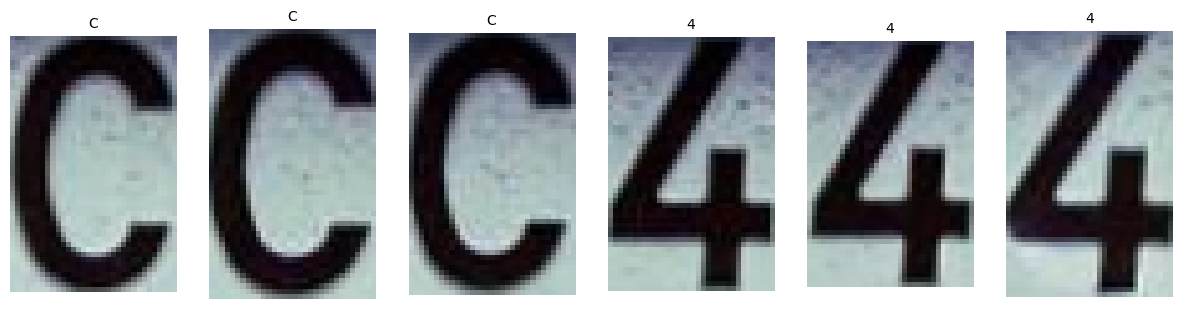

Full License Plate Number: CCC444
New license plate begins
Similarity with closest actual label (CCC444): 100.00%
Processing License Plate 2:


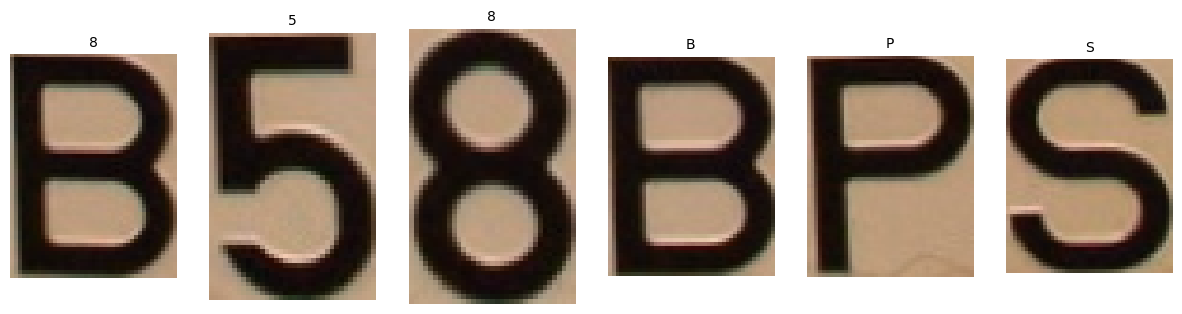

Full License Plate Number: 858BPS
New license plate begins
Similarity with closest actual label (B58BPS): 83.33%
Processing License Plate 3:


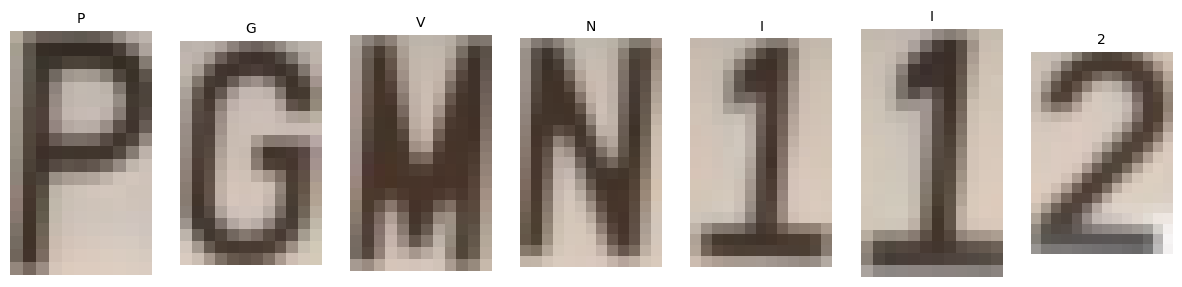

Full License Plate Number: PGVNII2
New license plate begins
Similarity with closest actual label (PGMN112): 57.14%
Processing License Plate 4:


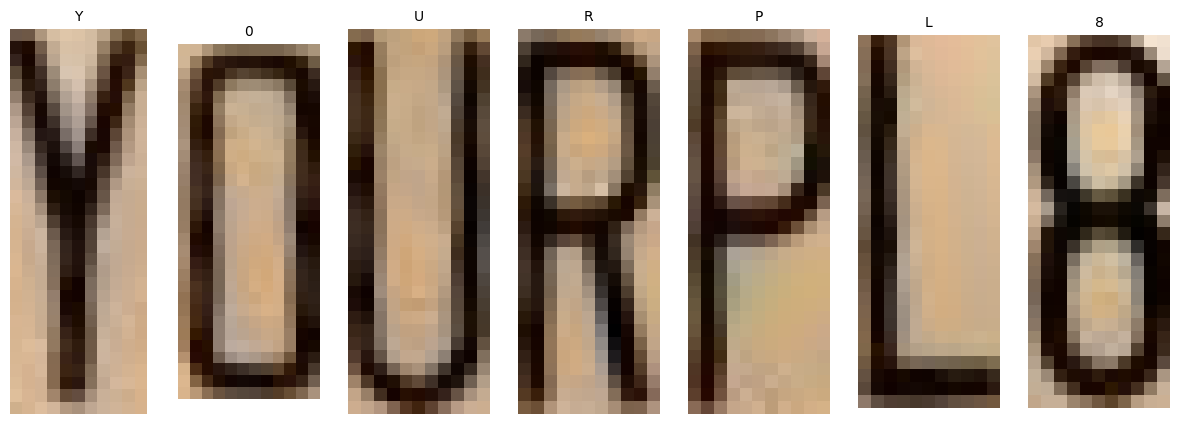

Full License Plate Number: Y0URPL8
New license plate begins
Similarity with closest actual label (Y0URPL8): 100.00%
Processing License Plate 5:


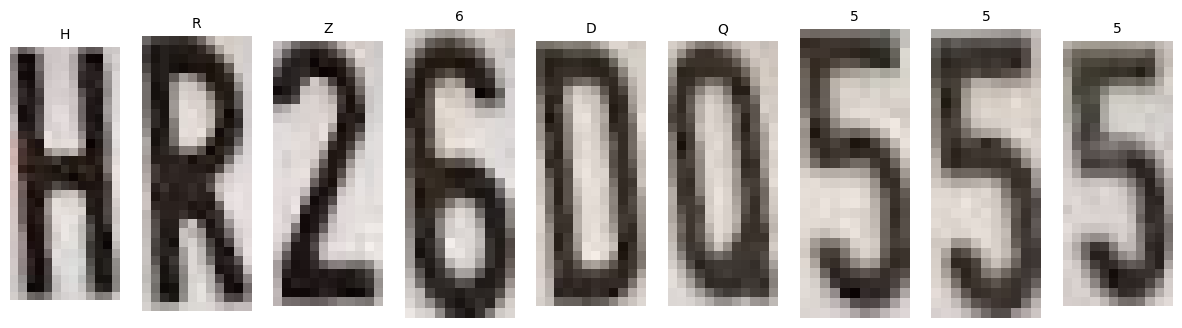

Full License Plate Number: HRZ6DQ555
New license plate begins
Similarity with closest actual label (HR26DQ5551): 80.00%
Processing License Plate 6:


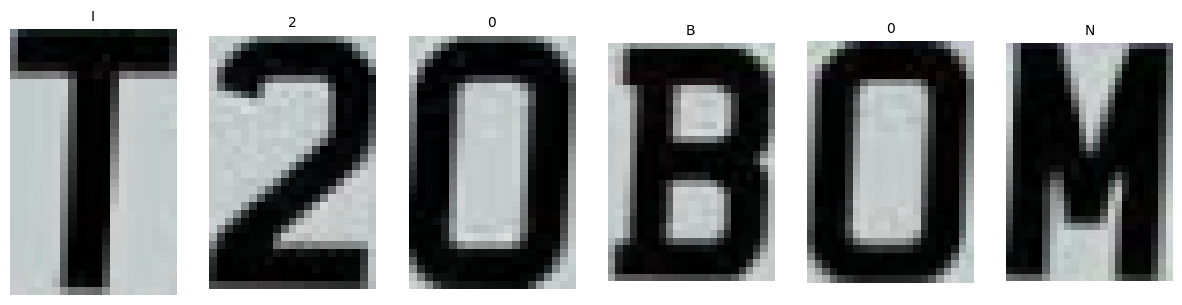

Full License Plate Number: I20B0N
New license plate begins
Similarity with closest actual label (IT20B0M): 71.43%
Processing License Plate 7:


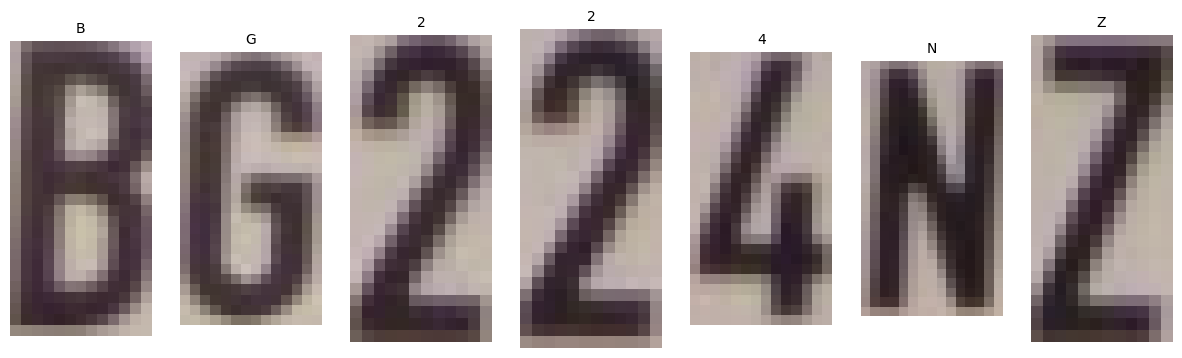

Full License Plate Number: BG224NZ
New license plate begins
Similarity with closest actual label (BG224NZ): 100.00%
Processing License Plate 8:


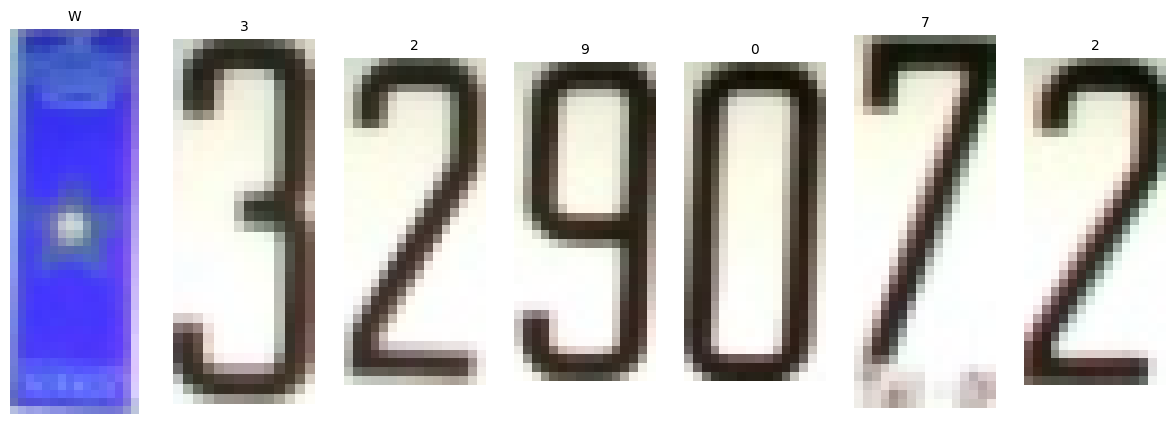

Full License Plate Number: W329072
New license plate begins
Similarity with closest actual label (3219072): 71.43%
Processing License Plate 9:


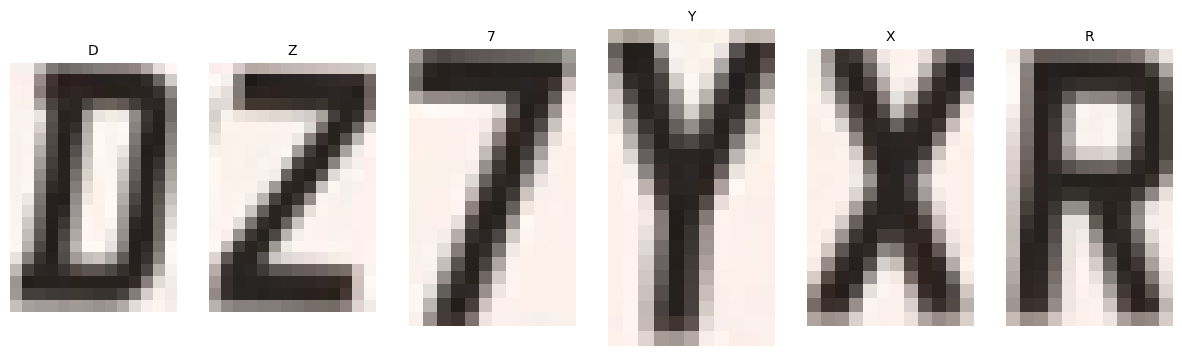

Full License Plate Number: DZ7YXR
New license plate begins
Similarity with closest actual label (DZI7YXR): 85.71%
Processing License Plate 10:


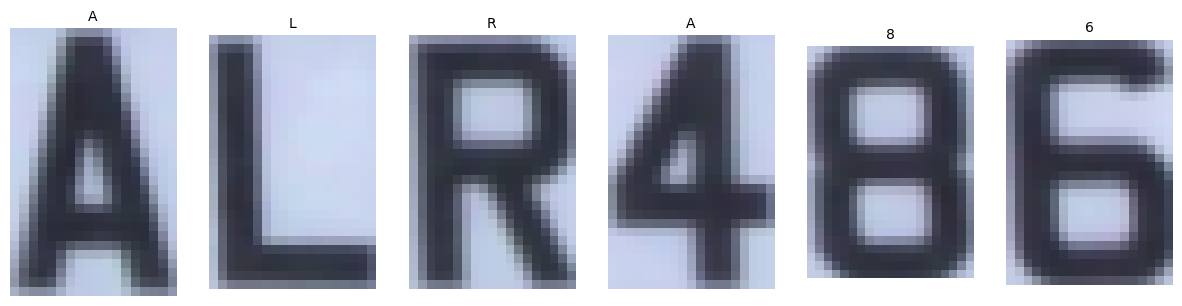

Full License Plate Number: ALRA86
New license plate begins
Similarity with closest actual label (ALR486): 83.33%
Processing License Plate 11:


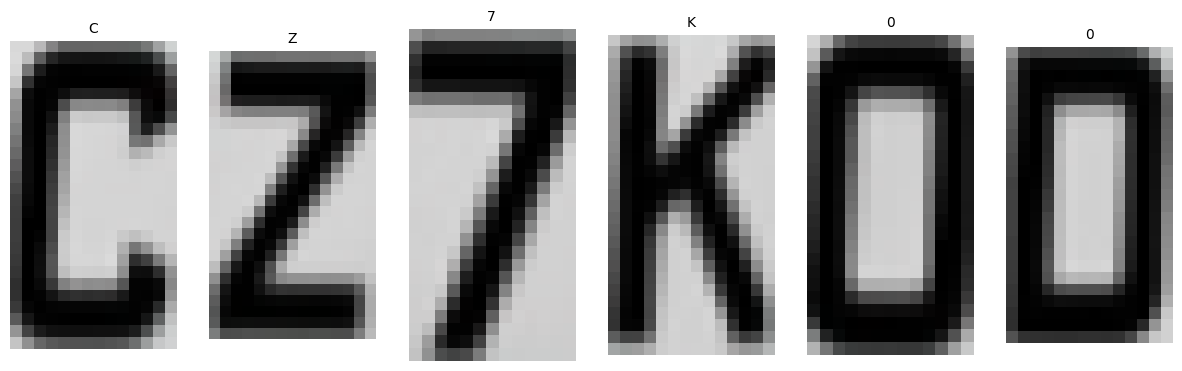

Full License Plate Number: CZ7K00
New license plate begins
Similarity with closest actual label (CZI7K0D): 71.43%
Processing License Plate 12:


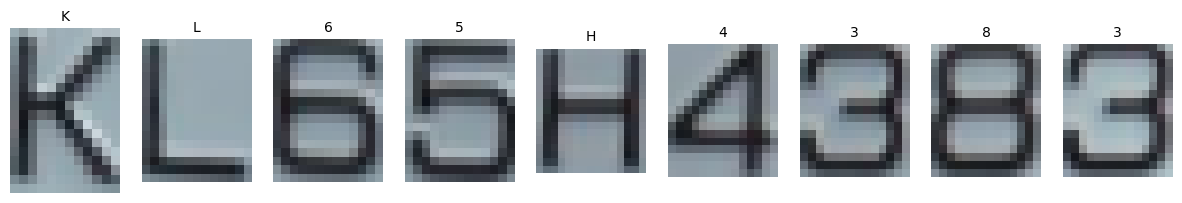

Full License Plate Number: KL65H4383
New license plate begins
Similarity with closest actual label (KL65H4383): 100.00%
Processing License Plate 13:


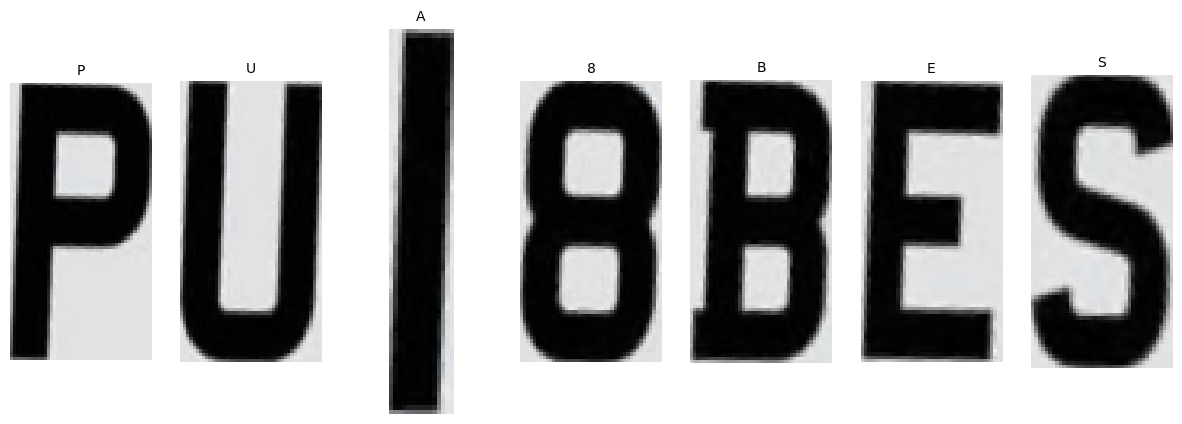

Full License Plate Number: PUA8BES
New license plate begins
Similarity with closest actual label (PUI8BES): 85.71%
Processing License Plate 14:


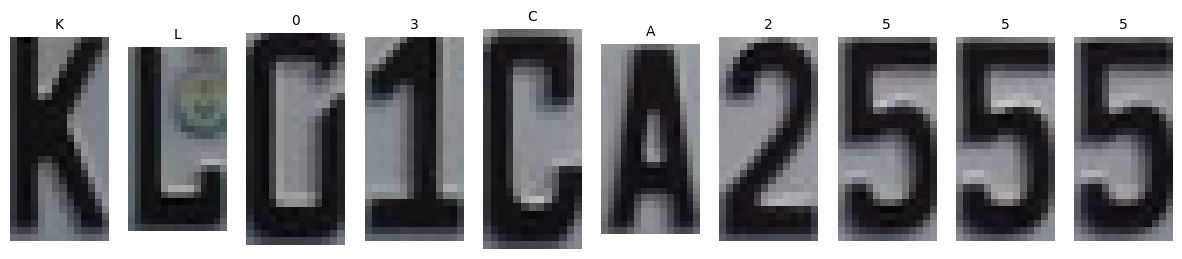

Full License Plate Number: KL03CA2555
New license plate begins
Similarity with closest actual label (KL01CA2555): 90.00%
Processing License Plate 15:


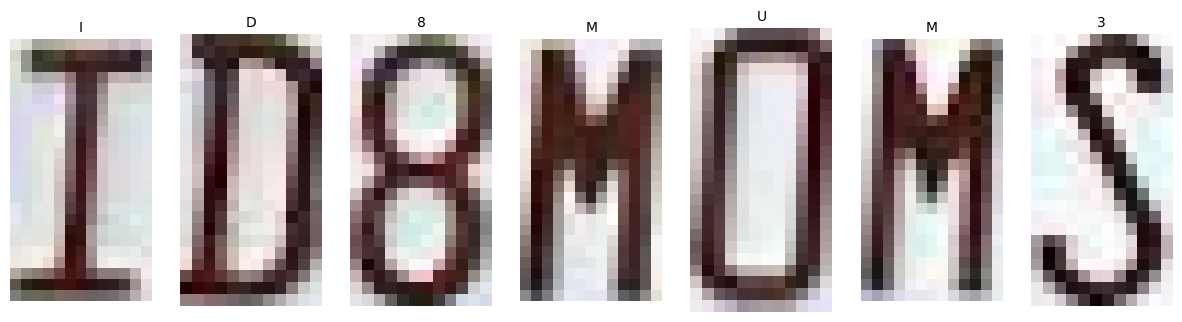

Full License Plate Number: ID8MUM3
New license plate begins
Similarity with closest actual label (ID8M0MS): 71.43%
Processing License Plate 16:


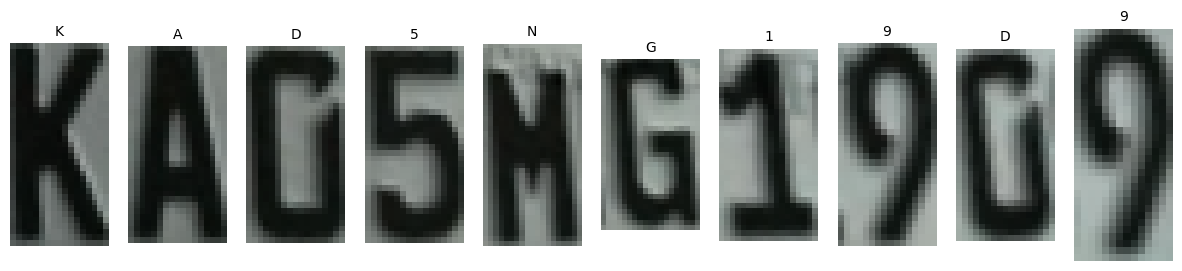

Full License Plate Number: KAD5NG19D9
New license plate begins
Similarity with closest actual label (KA05MG1909): 70.00%
Processing License Plate 17:


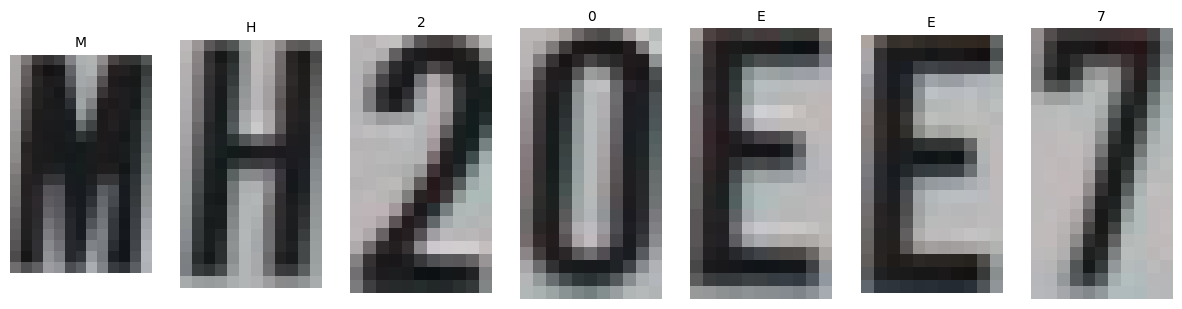

Full License Plate Number: MH20EE7
New license plate begins
Similarity with closest actual label (MH20EE7598): 70.00%
Processing License Plate 18:


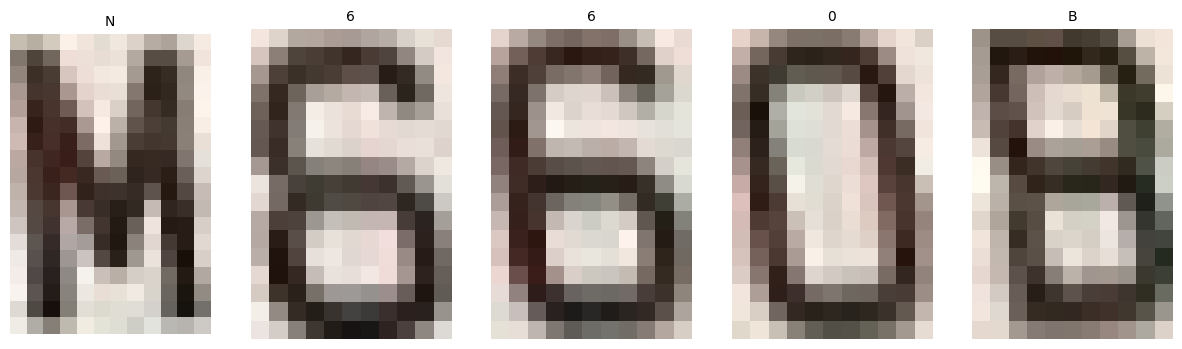

Full License Plate Number: N660B
New license plate begins
Similarity with closest actual label (M666Y0B): 57.14%
Processing License Plate 19:


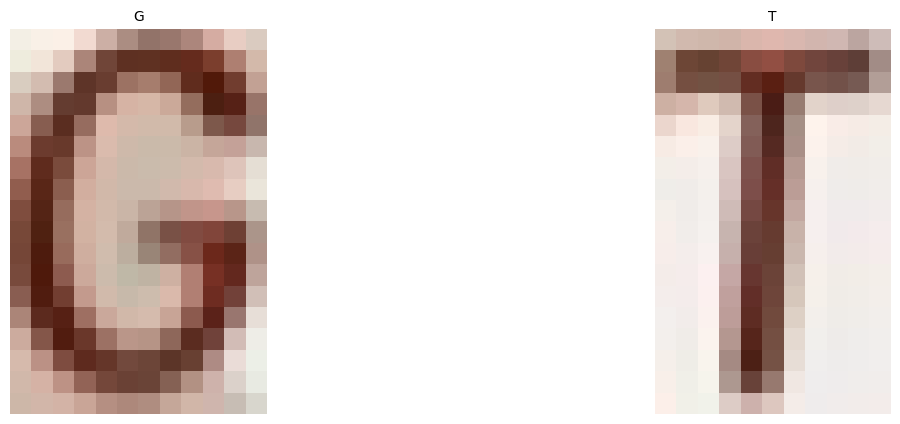

Full License Plate Number: GT
New license plate begins
Similarity with closest actual label (GT): 100.00%
Processing License Plate 20:


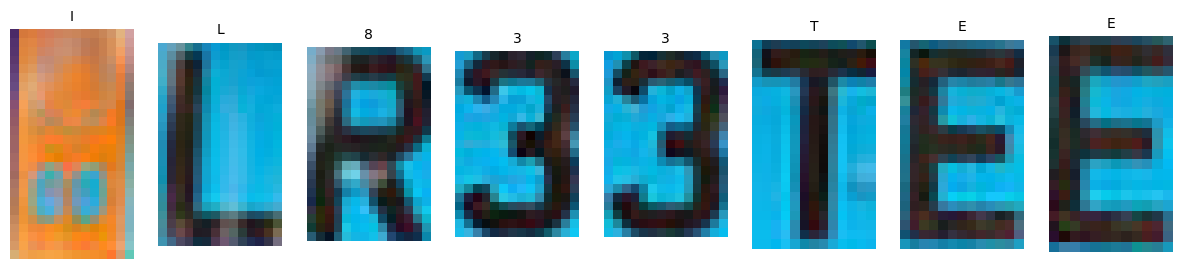

Full License Plate Number: IL833TEE
New license plate begins
Similarity with closest actual label (LR33TEE): 75.00%
Processing License Plate 21:


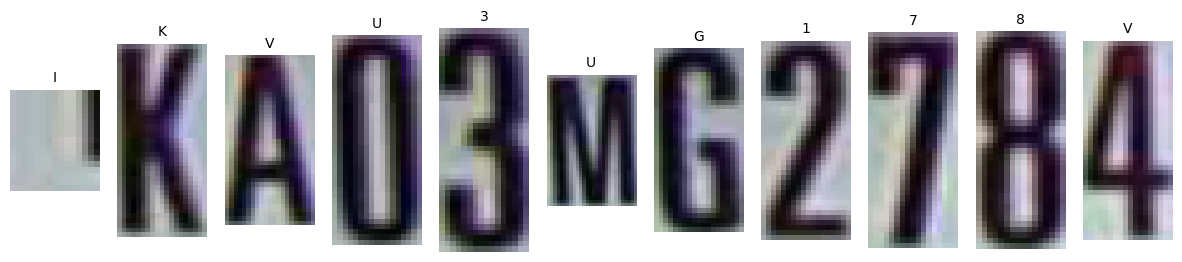

Full License Plate Number: IKVU3UG178V
New license plate begins
Similarity with closest actual label (KA03MG2784): 45.45%
Processing License Plate 22:


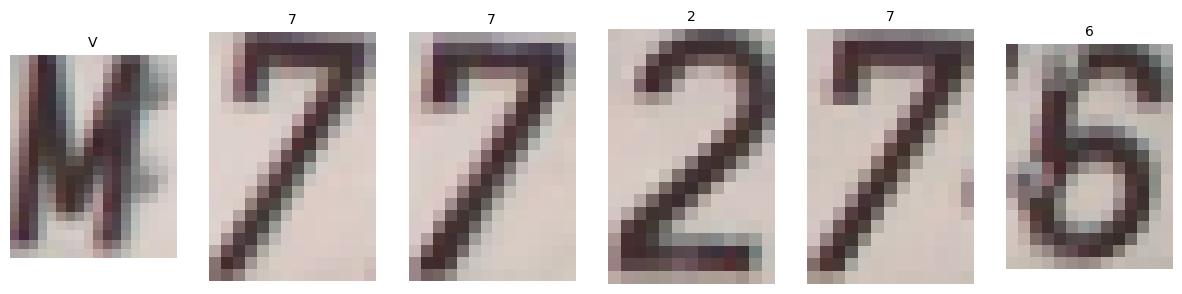

Full License Plate Number: V77276
New license plate begins
Similarity with closest actual label (M771276): 71.43%
Processing License Plate 23:


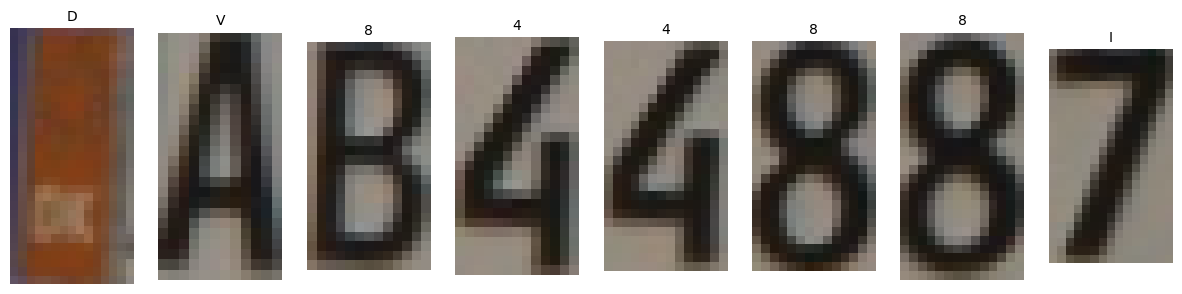

Full License Plate Number: DV84488I
New license plate begins
Similarity with closest actual label (AB44887): 50.00%
Processing License Plate 24:


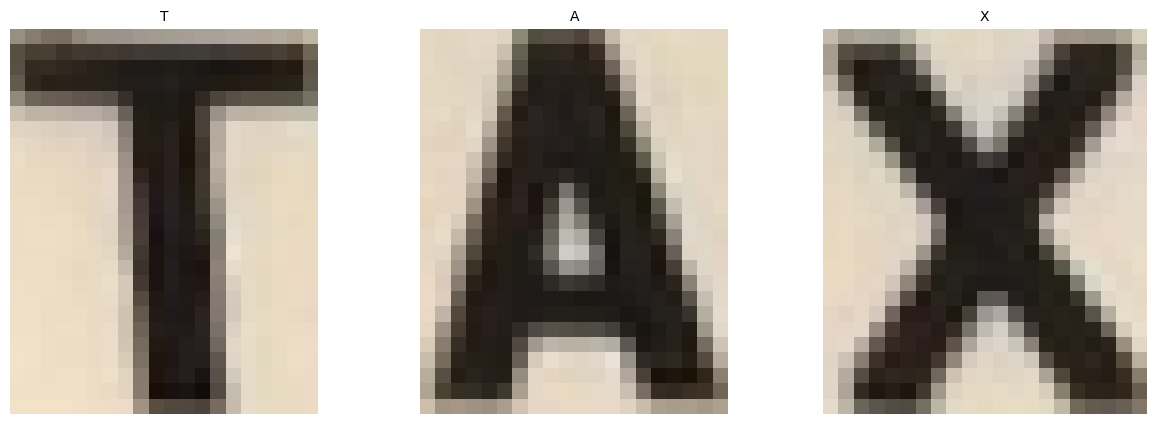

Full License Plate Number: TAX
New license plate begins
Similarity with closest actual label (TAXI): 75.00%
Processing License Plate 25:


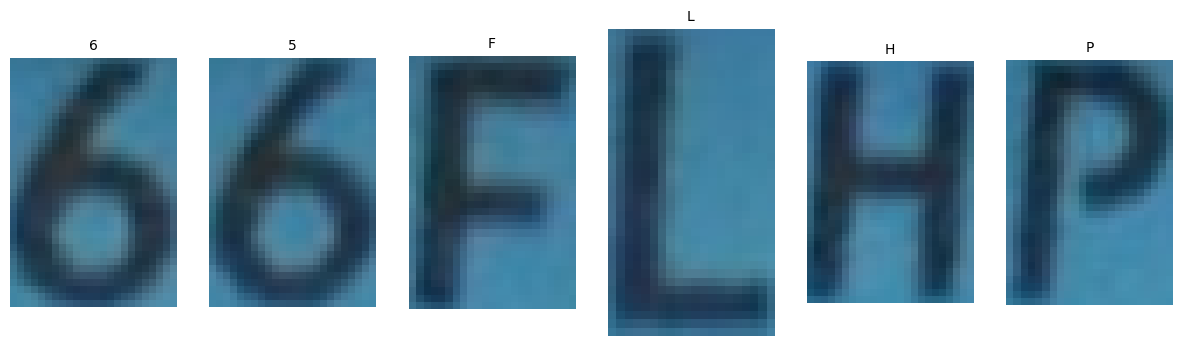

Full License Plate Number: 65FLHP
New license plate begins
Similarity with closest actual label (66FLHP): 83.33%
Processing License Plate 26:


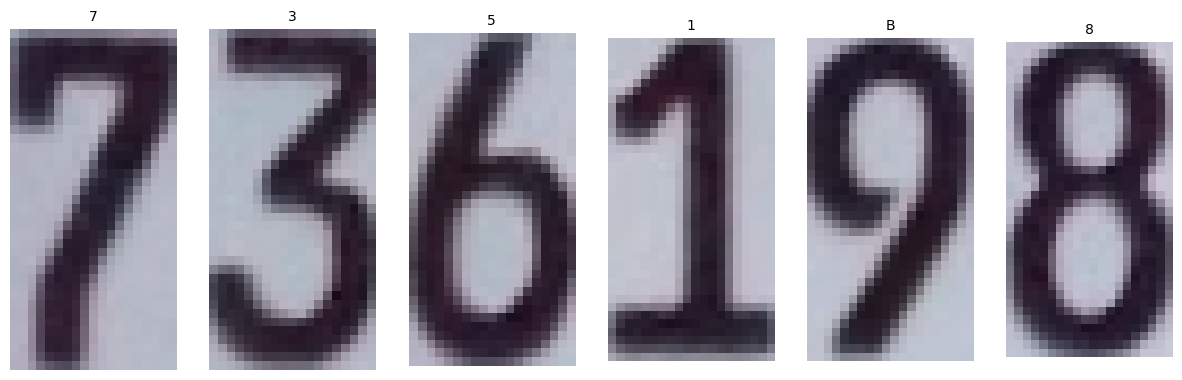

Full License Plate Number: 7351B8
New license plate begins
Similarity with closest actual label (736198): 66.67%
Processing License Plate 27:


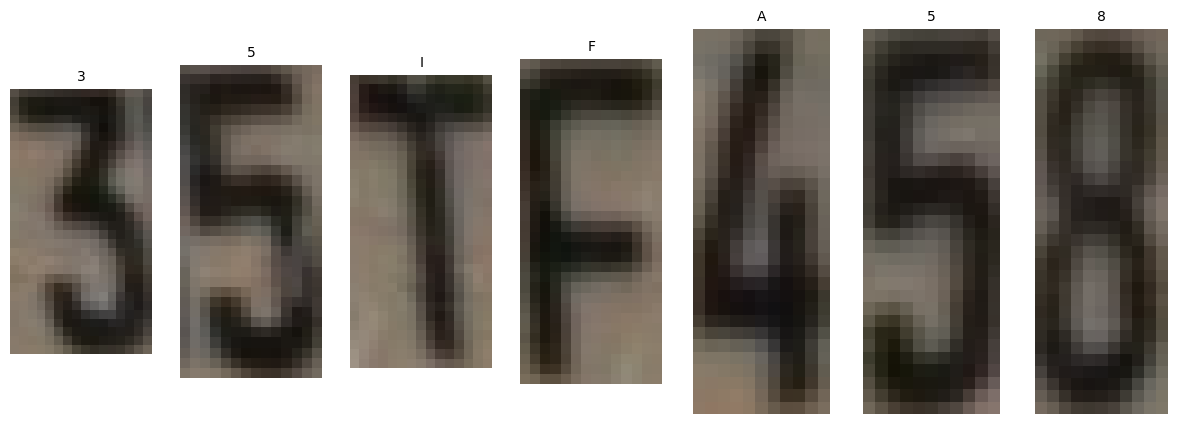

Full License Plate Number: 35IFA58
New license plate begins
Similarity with closest actual label (35TF458): 71.43%
Processing License Plate 28:


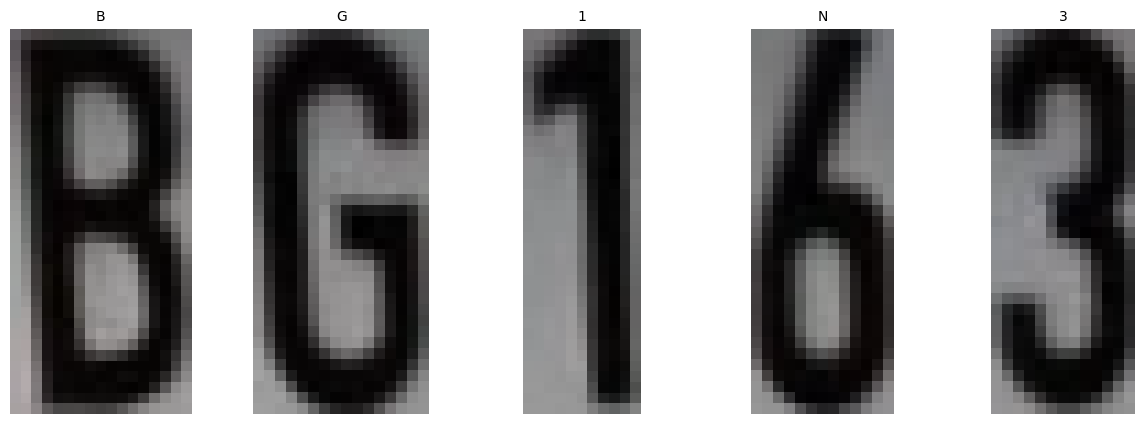

Full License Plate Number: BG1N3
New license plate begins
Similarity with closest actual label (BG163): 80.00%
Processing License Plate 29:


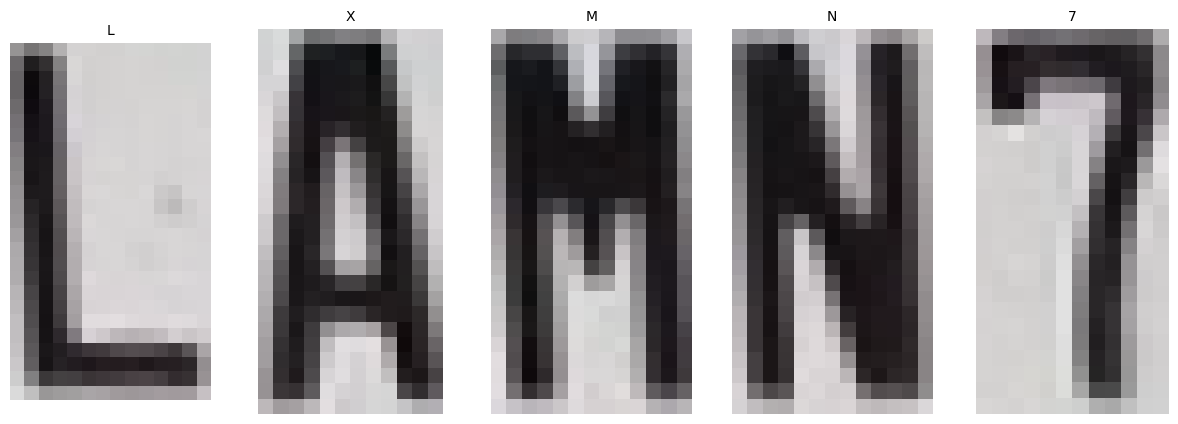

Full License Plate Number: LXMN7
New license plate begins
Similarity with closest actual label (LAWN17): 50.00%
Processing License Plate 30:


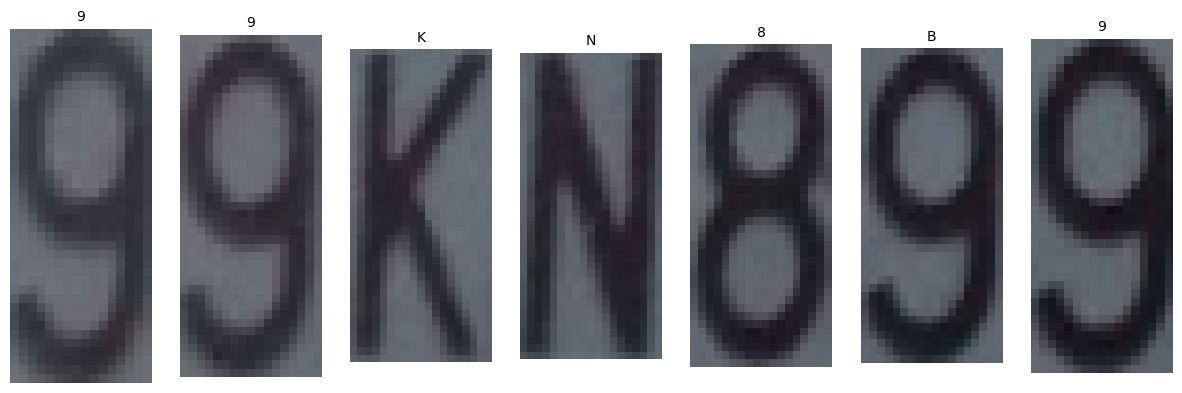

Full License Plate Number: 99KN8B9
New license plate begins
Similarity with closest actual label (99KN899): 85.71%
Processing License Plate 31:


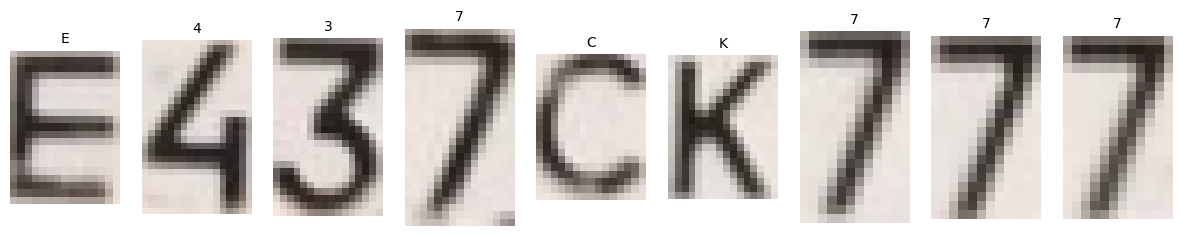

Full License Plate Number: E437CK777
New license plate begins
Similarity with closest actual label (E437CK777): 100.00%
Processing License Plate 32:


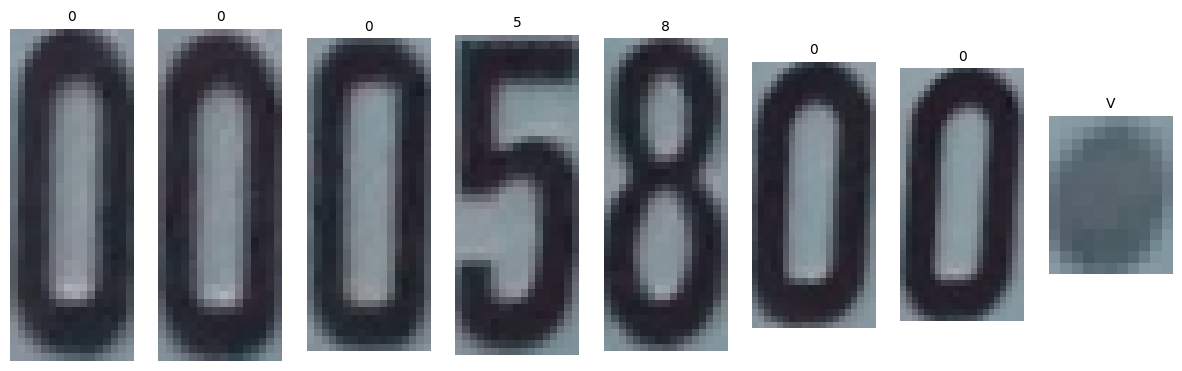

Full License Plate Number: 0005800V
New license plate begins
Similarity with closest actual label (0005800): 87.50%
Processing License Plate 33:


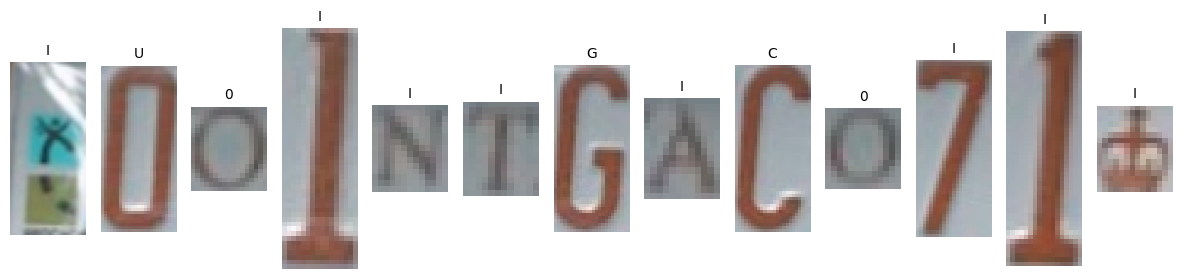

Full License Plate Number: IU0IIIGIC0III
New license plate begins
Similarity with closest actual label (01GC71): 23.08%
Processing License Plate 34:


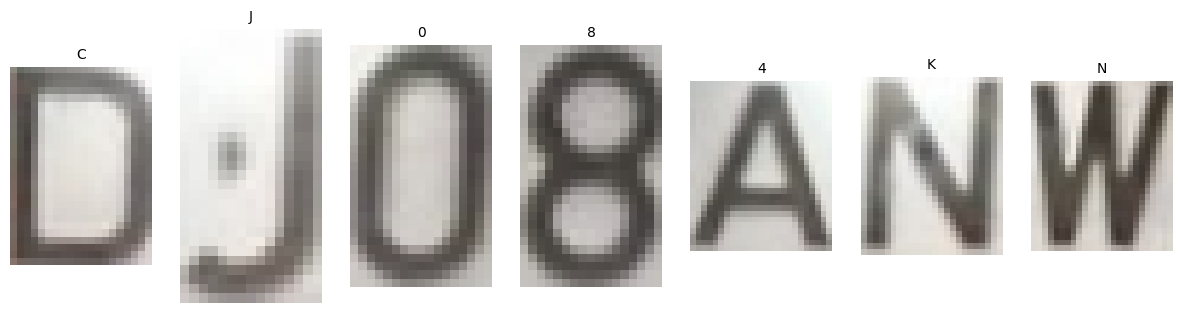

Full License Plate Number: CJ084KN
New license plate begins
Similarity with closest actual label (DJ08ANW): 42.86%
Processing License Plate 35:


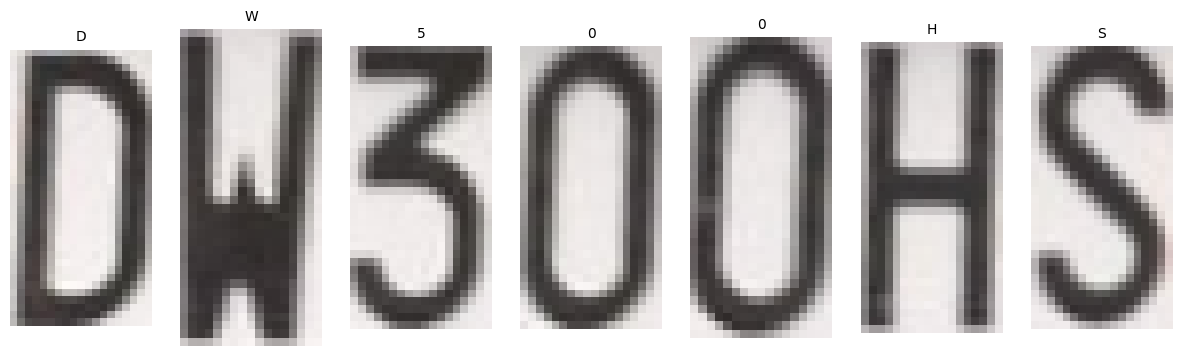

Full License Plate Number: DW500HS
New license plate begins
Similarity with closest actual label (DW300HS): 85.71%
Processing License Plate 36:


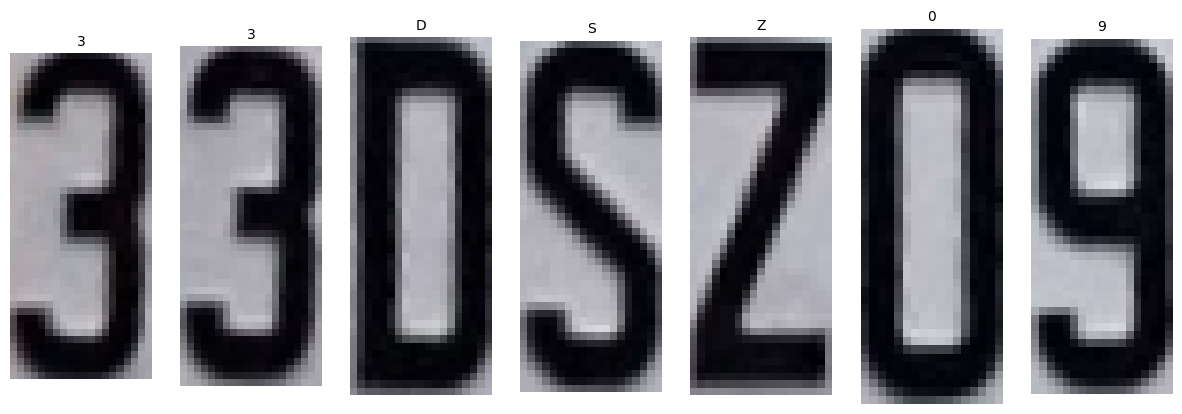

Full License Plate Number: 33DSZ09
New license plate begins
Similarity with closest actual label (33DSZ09): 100.00%
Processing License Plate 37:


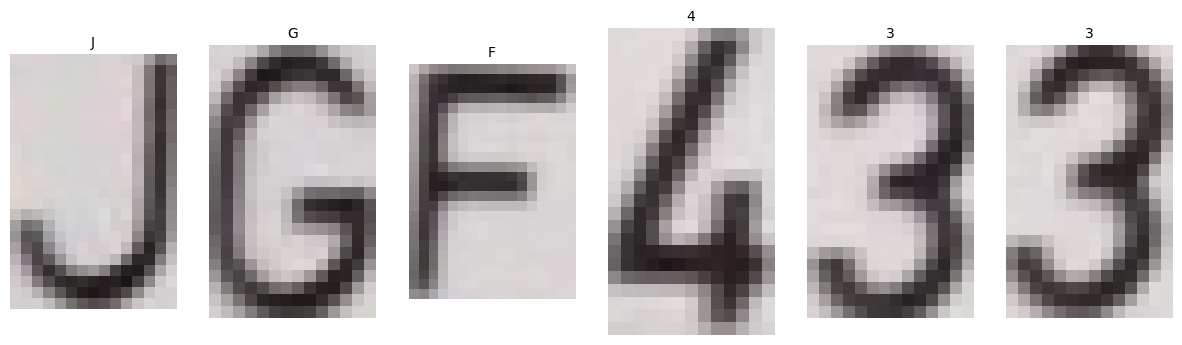

Full License Plate Number: JGF433
New license plate begins
Similarity with closest actual label (JGF433): 100.00%
Processing License Plate 38:


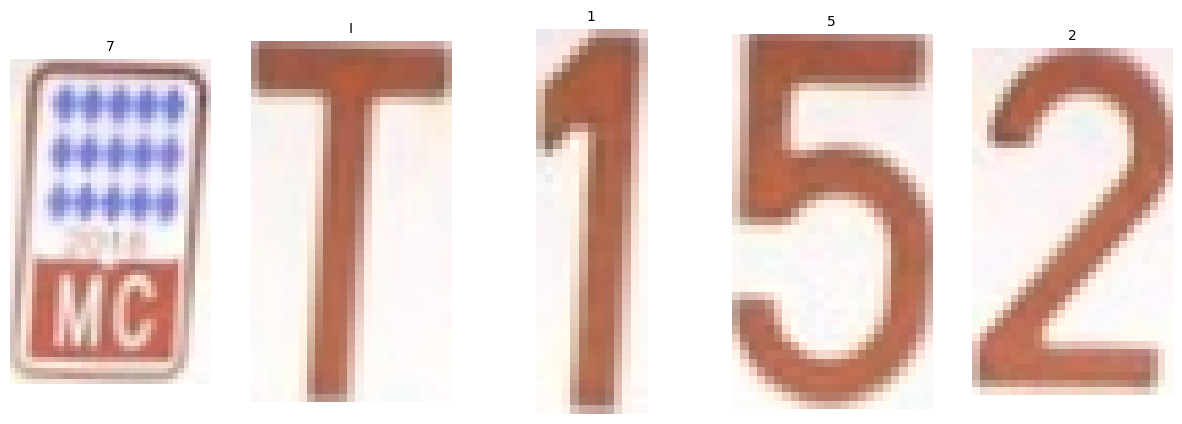

Full License Plate Number: 7I152
New license plate begins
Similarity with closest actual label (T152): 60.00%
Processing License Plate 39:


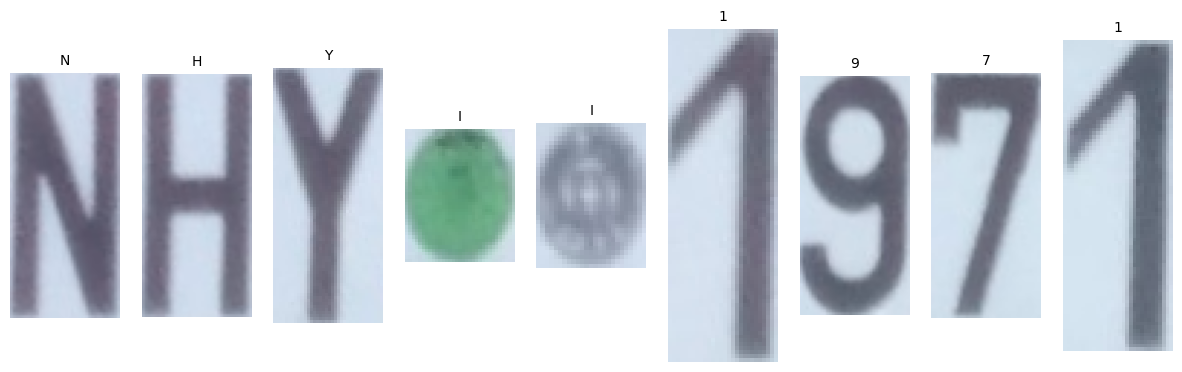

Full License Plate Number: NHYII1971
New license plate begins
Similarity with closest actual label (NHY1971): 77.78%
Processing License Plate 40:


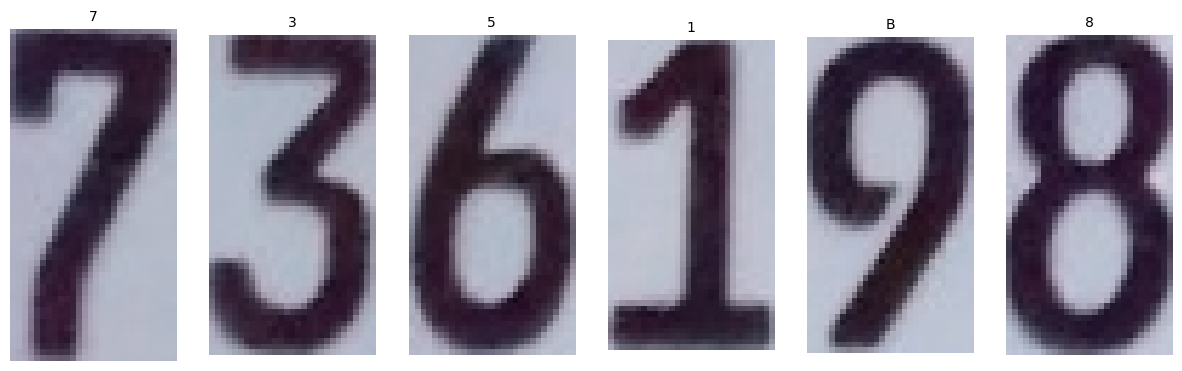

Full License Plate Number: 7351B8
New license plate begins
Similarity with closest actual label (52186): 16.67%
Processing License Plate 41:


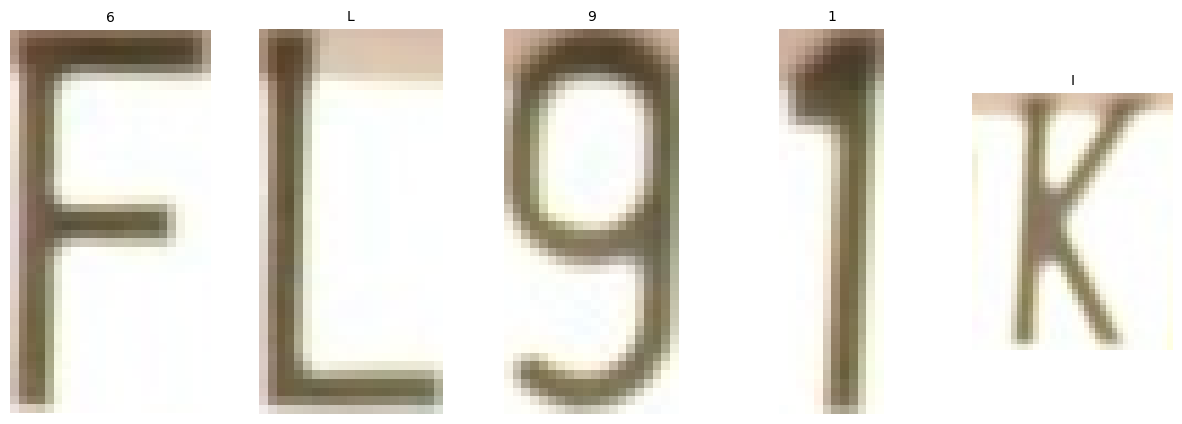

Full License Plate Number: 6L91I
New license plate begins
Similarity with closest actual label (FL913DK): 42.86%
Processing License Plate 42:


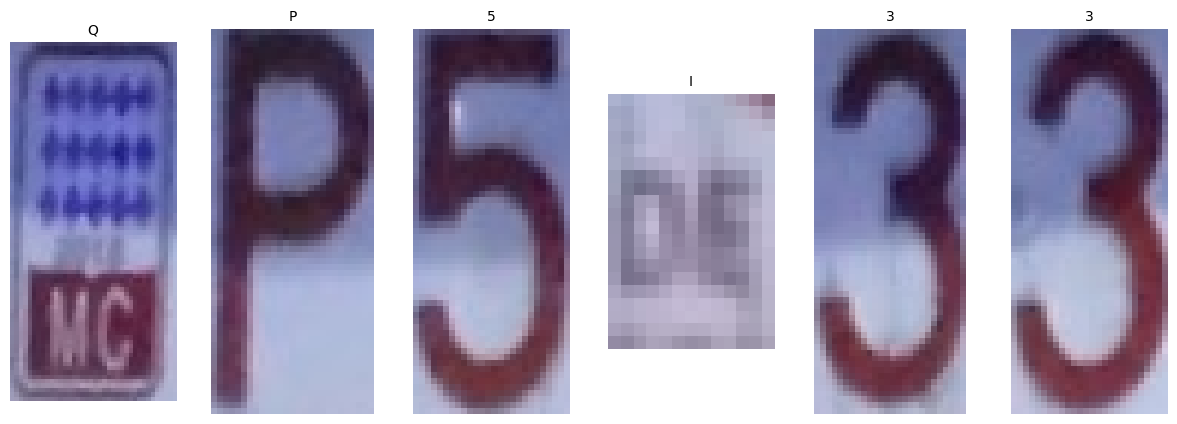

Full License Plate Number: QP5I33
New license plate begins
Similarity with closest actual label (P533): 66.67%
Processing License Plate 43:


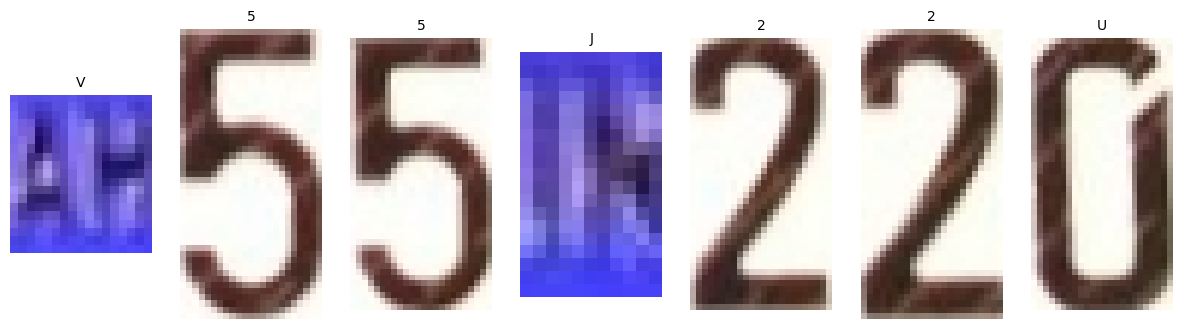

Full License Plate Number: V55J22U
New license plate begins
Similarity with closest actual label (55220): 57.14%
Processing License Plate 44:


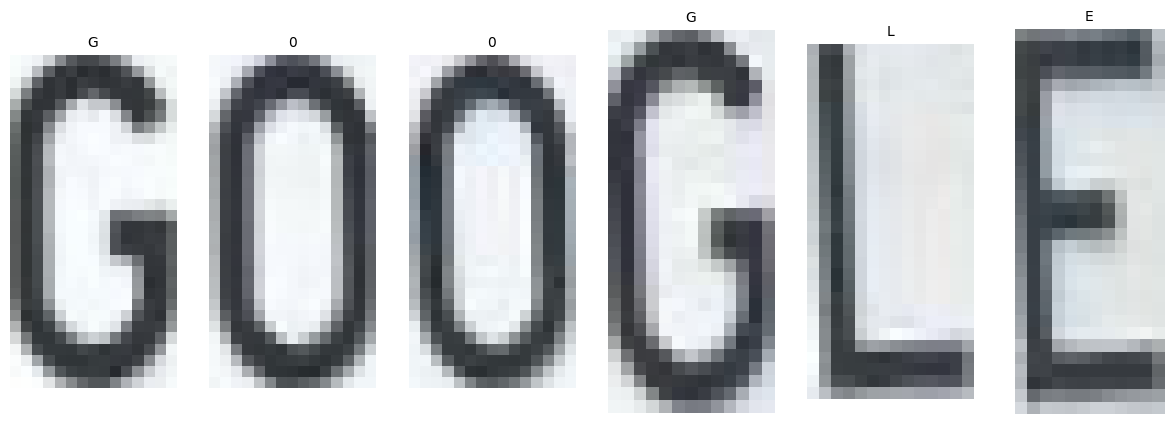

Full License Plate Number: G00GLE
New license plate begins
Similarity with closest actual label (G00GLE): 100.00%
Overall Accuracy of Correct License Plates: 18.37%
Average Character-by-Character Accuracy: 74.15%


In [ ]:
#Installing the python-Levenshtein package and other important libraries
!pip install python-Levenshtein
import os
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import Levenshtein

transform = transforms.Compose([
    transforms.Resize((128, 128)),#images converted to 128x128 pixels
    transforms.Grayscale(num_output_channels=1), #images are converted to greyscale
    transforms.ToTensor(), #convert to pytorch tensor
    transforms.Normalize((0.5,), (0.5,)) #normalization
])

# Function to display images and their predictions side by side
def show_images_with_predictions(images, predictions):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) #creating subplots for the images

    if num_images == 1:
        axes = [axes]

    for ax, img, pred in zip(axes, images, predictions):
        ax.imshow(img, cmap='gray')
        ax.set_title(pred, fontsize=10)
        ax.axis('off')

    plt.show()

def calculate_char_accuracy(predicted, actual):
    # Find the length of the shortest string
    min_len = min(len(predicted), len(actual)) # the length of the shorter string is determined,so min function

    # Count matching characters in the overlapping part of the strings
    correct_chars = sum(1 for i in range(min_len) if predicted[i] == actual[i]) # similar characters are counted

    # If no characters match, avoid division by zero
    if correct_chars == 0:
        return 0

    # Accuracy based on the overlapping length
    accuracy = (correct_chars / min_len) * 100 #calculating accuracy percentage
    return accuracy


# Levinshtein code is adapted from : https://blog.paperspace.com/implementing-levenshtein-distance-word-autocomplete-autocorrect/
def calculate_similarity(predicted, actual):

    distance = Levenshtein.distance(predicted, actual) #Levenshtein distance is calculated
    max_len = max(len(predicted), len(actual)) # length of the longer string, so max function

    similarity = (1 - distance / max_len) * 100 #a similarity score is calculated
    return similarity


char_accuracy_scores = [] # list to store character accuracy scores


dataset_path = '/content/drive/MyDrive/worked_cars/'
actual_labels = [folder_name for folder_name in os.listdir(dataset_path)] #iterate through and store folder names

# Initializing lists to store predictions and matched license plates
predictions = []
matched_plates = []

used_labels = set()

# Iterate through the segmented characters by license plate
for plate_index, plate in enumerate(segmented_characters):
    license_plate_number = ""  # Initialize an empty string to store the full string license plate number
    images = []
    pred_labels = []

    print(f"Processing License Plate {plate_index + 1}:")

    for char_index, char_img_pil in enumerate(plate):

        input_tensor = transform(char_img_pil).unsqueeze(0)  #apply transformations and batch dimension

        output = model(input_tensor)
        _, predicted_idx = torch.max(output, 1) #get predicted class index
        predicted_label = dataset.classes[predicted_idx.item()]

        license_plate_number += predicted_label

        # Store image and its prediction
        images.append(char_img_pil)
        pred_labels.append(predicted_label)


    show_images_with_predictions(images, pred_labels)


    predictions.append(license_plate_number)


    print(f"Full License Plate Number: {license_plate_number}")
    print("New license plate begins")

    # assigning the closest label, but ensuring that it has not been used to avoid assigning same labels
    closest_label = min(
        (label for label in actual_labels if label not in used_labels),
        key=lambda label: Levenshtein.distance(license_plate_number, label),
        default=None
    )

    if closest_label:
        # mark the closest label as used
        used_labels.add(closest_label)

        # store and calculate the similarity score between the actual truth label and the predicted license plate
        similarity = calculate_similarity(license_plate_number, closest_label)
        char_accuracy_scores.append(similarity)
        print(f"Similarity with closest actual label ({closest_label}): {similarity:.2f}%")
    else:
        print("No available label to match with the predicted license plate.")

# Calculating overall accuracy
correct_predictions = len([plate for plate in predictions if plate in used_labels])
overall_accuracy = correct_predictions / len(actual_labels) * 100

# Calculating average character-by-character accuracy
average_char_accuracy = sum(char_accuracy_scores) / len(char_accuracy_scores) if char_accuracy_scores else 0

print(f"Overall Accuracy of Correct License Plates: {overall_accuracy:.2f}%")
print(f"Average Character-by-Character Accuracy: {average_char_accuracy:.2f}%")
